<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code to Plot Losses inline in this notebook

In [2]:
%matplotlib inline

## The Task for the AI



## Prerequisite 

In [7]:
import numpy as np                 # advanced math library
import matplotlib.pyplot as plt    # MATLAB like plotting routines
import random                      # For generating random number
%matplotlib inline


from keras.datasets import mnist      # MNIST dataset is included in keras
from keras.models import Sequential   # Model type to be used

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Loading Training Data

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


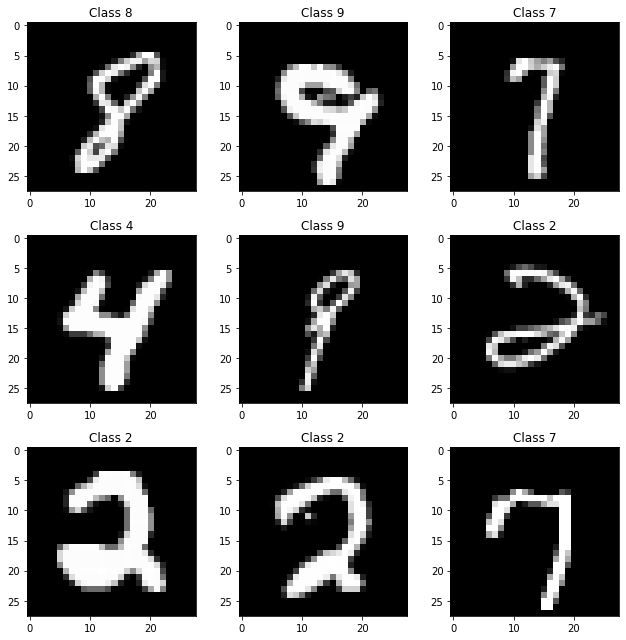

In [9]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()




In [10]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0  141  255  170   86    0    0    0    0   86   57  0  0  0  0  0  0  0  0  
0  0  0  0  0  0    0   57  114  114  255  255  255  255  255  255  198  255  255  255  0  0  0 

In [15]:
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255   # normalize each value for each pixel 


In [16]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)      

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [18]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [19]:
# The Sequential model is a linear stack of layers
model = Sequential()

In [21]:
# The first hidden layer is a set of 512 nodes (artifical neurons)
# Each 
model.add(Dense(512, input_shape = (784,)))

In [22]:
model.add(Activation('relu'))

In [23]:
model.add(Dropout(0.2))

In [24]:
# Adding Second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The Final Output Layer

In [25]:
model.add(Dense(10))

In [26]:
model.add(Activation('softmax'))

In [27]:
# Summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

What are trainable and non- trininable parametersin the summary

## Compiling the model

In [28]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


In [30]:
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1637 - accuracy: 0.9509
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1428 - accuracy: 0.9571
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1263 - accuracy: 0.9618
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1127 - accuracy: 0.9662
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1037 - accuracy: 0.9681
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0931 - accuracy: 0.9718
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0854 - accuracy: 0.9737
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0802 - accuracy: 0.9751
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0733 - accuracy: 0.9779
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0682 - accura